## K-means
### PUCMINAS 

Nahari Terena

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator


warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning

In [2]:
data = 'C://Users//Olnalu//Desktop//Nahari//PUCMINAS//Dados//base_final.csv'

df = pd.read_csv(data, sep = ";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22442 entries, 0 to 22441
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   NUMERODO    22442 non-null  int64
 1   IND_RC      22442 non-null  int64
 2   QTDGESTANT  22442 non-null  int64
 3   QTDFILVIVO  22442 non-null  int64
 4   GESTACAO    22442 non-null  int64
 5   PESO        22442 non-null  int64
 6   QTDPARTNOR  22442 non-null  int64
 7   TPROBSON    22442 non-null  int64
 8   PARIDADE    22442 non-null  int64
 9   CONSULTAS   22442 non-null  int64
 10  KOTELCHUCK  22442 non-null  int64
 11  IDADEMAE    22442 non-null  int64
 12  QTDFILMORT  22442 non-null  int64
 13  IDADE       22442 non-null  int64
 14  CONSPRENAT  22442 non-null  int64
 15  QTDPARTCES  22442 non-null  int64
dtypes: int64(16)
memory usage: 2.7 MB


In [4]:
df1 = df[df['IND_RC'] == 1]
df0 = df[df['IND_RC'] == 0]

df1.drop(['NUMERODO', 'IND_RC'], axis=1, inplace=True)
df0.drop(['NUMERODO', 'IND_RC'], axis=1, inplace=True)

## Normalizando os valores

In [5]:
ms = MinMaxScaler()
cols1 = df1.columns

X1 = ms.fit_transform(df1)
X1 = pd.DataFrame(X1, columns = [cols1])

cols0 = df0.columns

X0 = ms.fit_transform(df0)
X0 = pd.DataFrame(X0, columns = [cols0])

In [6]:
X1.head()

,QTDGESTANT,QTDFILVIVO,GESTACAO,PESO,QTDPARTNOR,TPROBSON,PARIDADE,CONSULTAS,KOTELCHUCK,IDADEMAE,QTDFILMORT,IDADE,CONSPRENAT,QTDPARTCES
0,0.363636,0.272727,0.6,0.614904,0.181818,1.000000,1.0,0.250,0.125,0.333333,0.25,1.0,0.050505,0.25
1,0.181818,0.090909,0.8,0.619067,0.090909,0.444444,1.0,0.375,0.125,0.282051,0.25,0.5,0.070707,0.25
2,0.000000,0.000000,0.8,0.367194,0.000000,0.000000,0.0,0.125,0.125,0.128205,0.00,0.0,0.020202,0.00
3,0.454545,0.454545,0.2,0.104913,0.454545,0.777778,1.0,0.125,0.250,0.589744,0.00,0.0,0.030303,0.00
4,0.000000,0.000000,0.8,0.388010,0.000000,0.000000,0.0,0.125,0.125,0.307692,0.00,1.0,0.010101,0.00


In [7]:
X0.head()

,QTDGESTANT,QTDFILVIVO,GESTACAO,PESO,QTDPARTNOR,TPROBSON,PARIDADE,CONSULTAS,KOTELCHUCK,IDADEMAE,QTDFILMORT,IDADE,CONSPRENAT,QTDPARTCES
0,0.066667,0.071429,0.8,0.472464,0.000000,0.4,1.0,0.375,0.500,0.103448,0.0,1.0,0.080808,0.025
1,0.066667,0.071429,0.2,0.070290,0.033333,0.7,1.0,0.250,0.250,0.206897,0.0,0.0,0.040404,0.000
2,0.066667,0.071429,0.4,0.127536,0.000000,0.9,1.0,0.250,0.375,0.114943,0.0,0.0,0.060606,0.025
3,0.000000,0.000000,0.6,0.350000,0.000000,0.9,0.0,0.250,0.250,0.091954,0.0,0.0,0.050505,0.000
4,0.066667,0.071429,0.6,0.469565,0.033333,0.9,1.0,0.250,1.000,0.160920,0.0,1.0,0.050505,0.000


## Quantidade de clusters

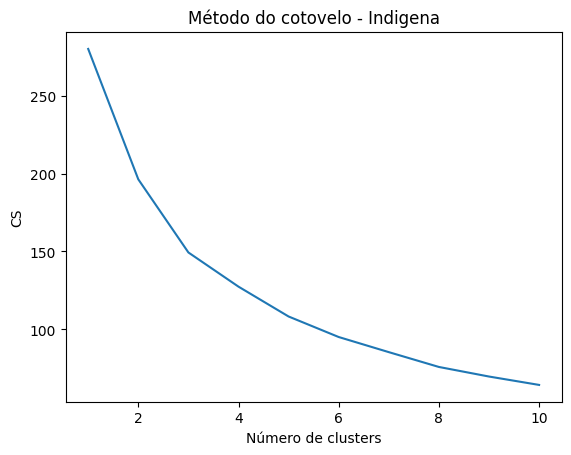

In [8]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Método do cotovelo - Indigena')
plt.xlabel('Número de clusters')
plt.ylabel('CS')
plt.show()

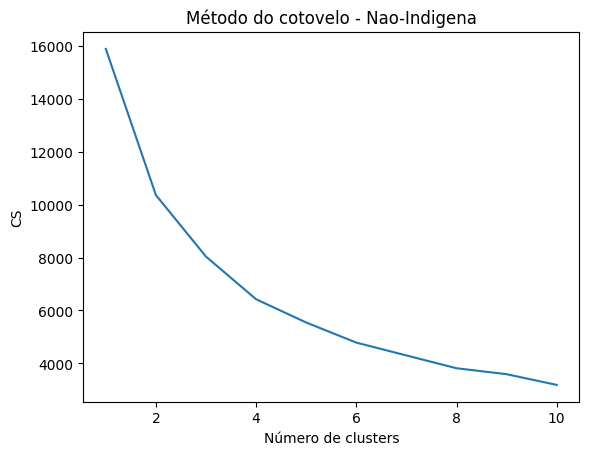

In [9]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X0)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Método do cotovelo - Nao-Indigena')
plt.xlabel('Número de clusters')
plt.ylabel('CS')
plt.show()

In [10]:
nbrs = NearestNeighbors(n_neighbors = 4).fit(X1)
neigh_dist, neigh_ind = nbrs.kneighbors(X1)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 3]

kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

print(kneedle.knee_y)

0.9095756007049094


In [11]:
nbrs = NearestNeighbors(n_neighbors = 4).fit(X0)
neigh_dist, neigh_ind = nbrs.kneighbors(X0)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 3]

kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

print(kneedle.knee_y)

0.38143083369938735


In [20]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=150,random_state= 10)
    kmeans.fit(X1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("Para {0} clusters, a silhouette score é de {1}".format(num_clusters, silhouette_avg))

Para 2 clusters, a silhouette score é de 0.6241173055274641
Para 3 clusters, a silhouette score é de 0.5512689261223229
Para 4 clusters, a silhouette score é de 0.5446271554113034
Para 5 clusters, a silhouette score é de 0.559506407894607
Para 6 clusters, a silhouette score é de 0.5470042924663965
Para 7 clusters, a silhouette score é de 0.5588440000658135
Para 8 clusters, a silhouette score é de 0.5586475468717818


In [54]:
kmeans = KMeans(n_clusters=3,random_state=10)

kmeans.fit(X1)

labels = kmeans.labels_

X1['Cluster_Id'] = kmeans.labels_

kmeans.inertia_

43047164.813989654

In [55]:
kmeans = KMeans(n_clusters=3,random_state=10)

kmeans.fit(X0)

labels = kmeans.labels_

X0['Cluster_Id'] = kmeans.labels_

kmeans.inertia_

2841122426.310939

## Visual dos clusters

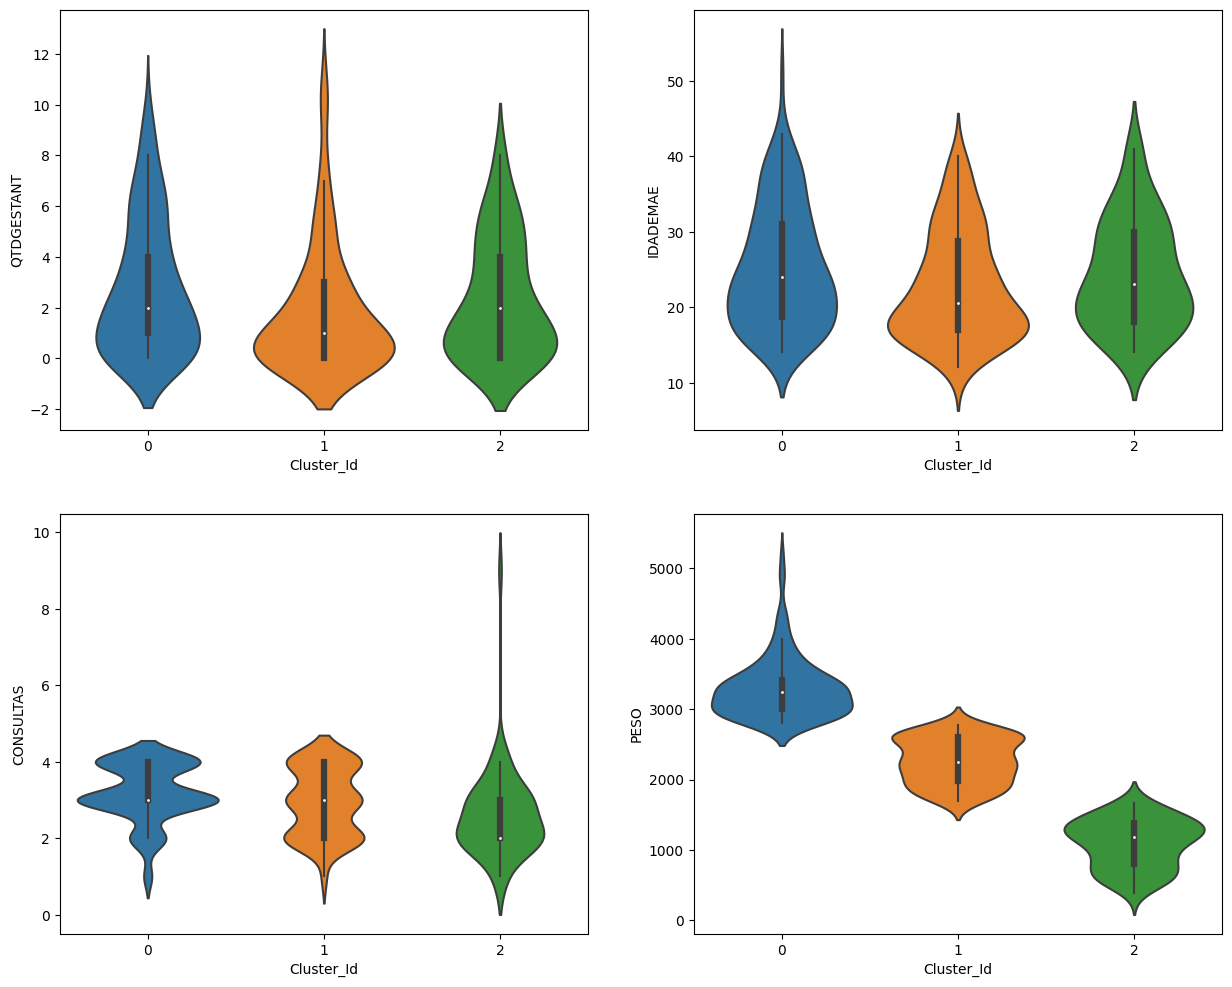

In [56]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'QTDGESTANT', data = df1,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'IDADEMAE', data = df1,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'CONSULTAS', data=df1,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'PESO', data=df1,ax=axes[1][1])
plt.show()

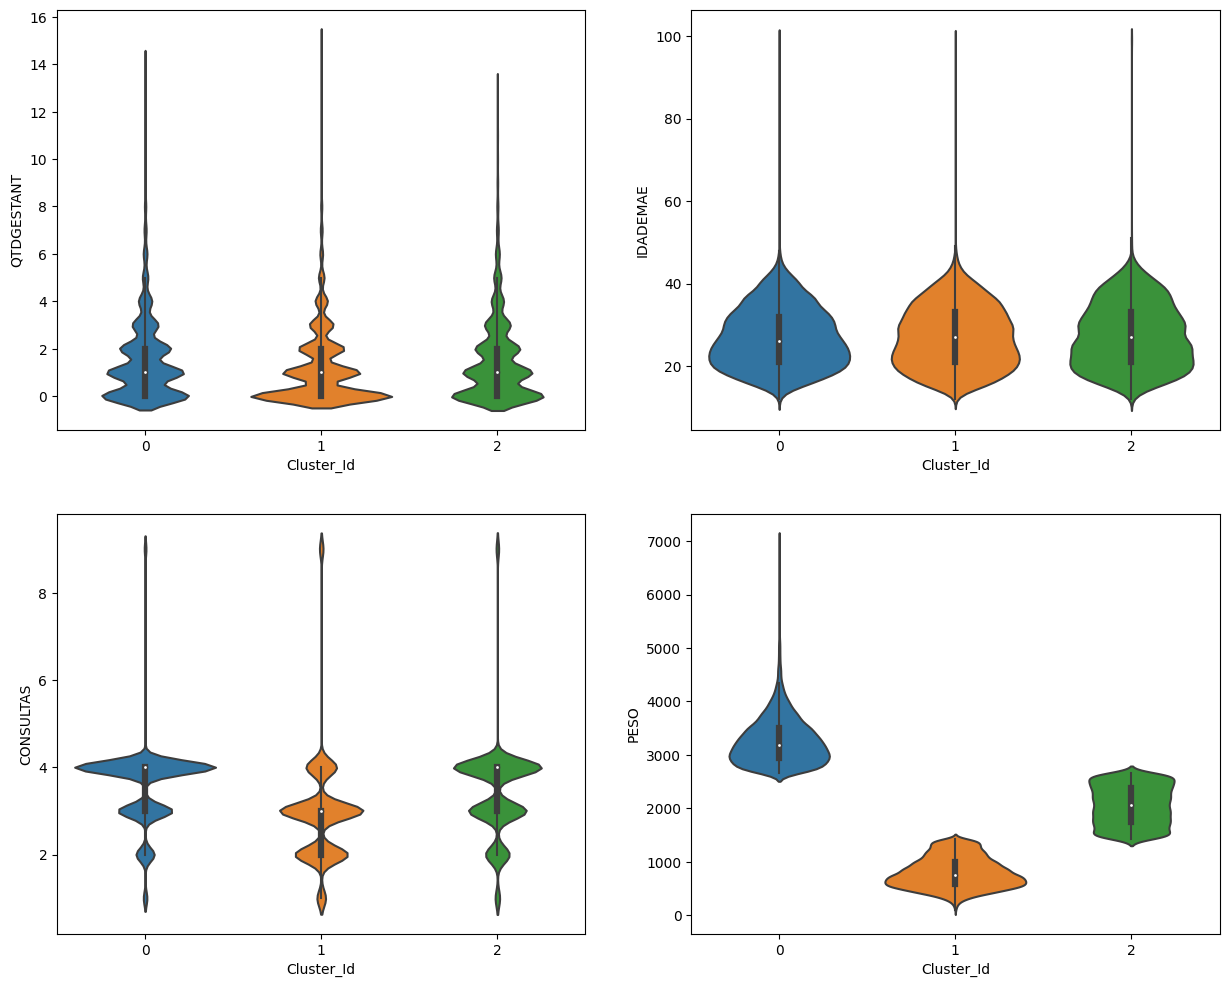

In [57]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'QTDGESTANT', data = df0,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'IDADEMAE', data = df0,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'CONSULTAS', data=df0,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'PESO', data=df0,ax=axes[1][1])
plt.show()

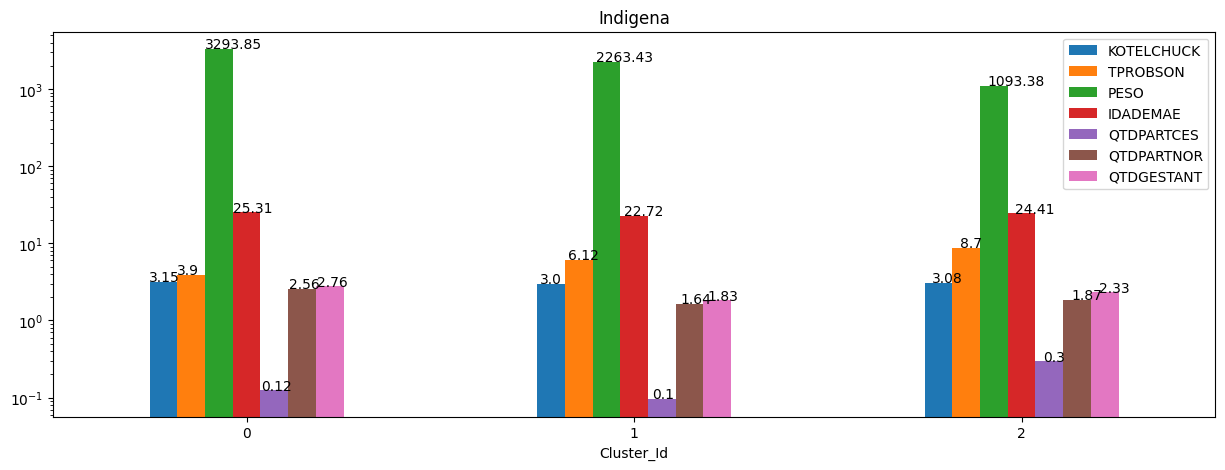

In [58]:
ax=df1[['KOTELCHUCK','TPROBSON','PESO','IDADEMAE','QTDPARTCES','QTDPARTNOR','QTDGESTANT','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.title("Indigena")
plt.show();

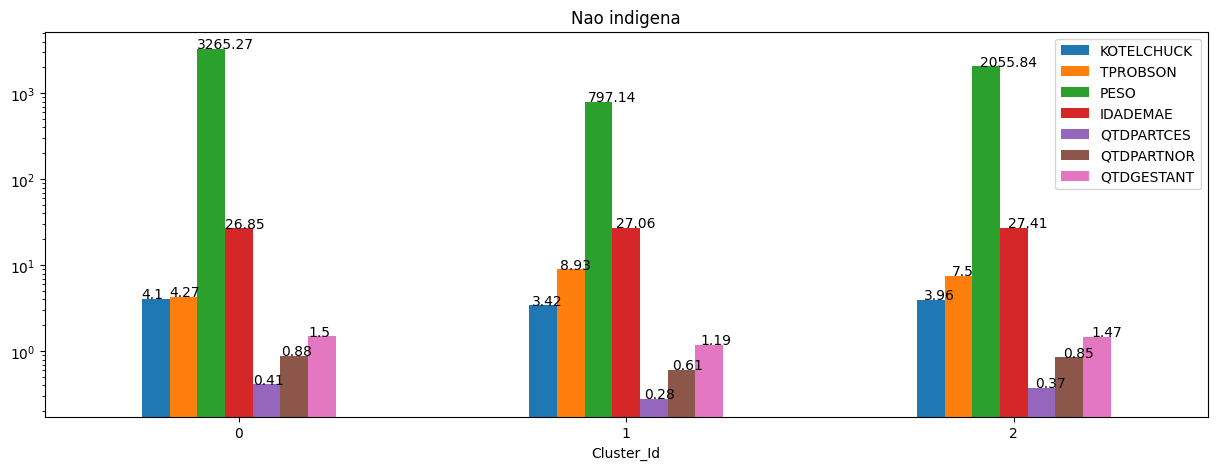

In [59]:
ax=df0[['KOTELCHUCK','TPROBSON','PESO','IDADEMAE','QTDPARTCES','QTDPARTNOR','QTDGESTANT','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.title("Nao indigena")
plt.show();

## Cluster profilling

In [60]:
df1.Cluster_Id.value_counts(ascending=True)

2     61
1     94
0    144
Name: Cluster_Id, dtype: int64

In [61]:
df0.Cluster_Id.value_counts(ascending=True)

2     5590
0     6167
1    10386
Name: Cluster_Id, dtype: int64

In [62]:
df1[df1['Cluster_Id']==1].sort_values(by = ['KOTELCHUCK','TPROBSON','QTDGESTANT',], ascending = [False, True, False]).head()

,QTDGESTANT,QTDFILVIVO,GESTACAO,PESO,QTDPARTNOR,TPROBSON,PARIDADE,CONSULTAS,KOTELCHUCK,IDADEMAE,QTDFILMORT,IDADE,CONSPRENAT,QTDPARTCES,Cluster_Id
22126,0,0,4,1970,0,8,0,3,9,15,0,0,5,0,1
6154,3,3,4,2190,3,10,1,3,9,24,0,1,6,0,1
7854,0,0,5,2680,0,1,0,4,5,17,0,2,7,0,1
15938,0,0,5,2246,0,1,0,4,5,20,0,1,8,0,1
6599,0,0,5,2075,0,2,0,4,5,19,0,0,7,0,1


In [63]:
df1[df1['Cluster_Id']==2].sort_values(by = ['KOTELCHUCK','TPROBSON','QTDGESTANT',], ascending = [False, True, False]).head()

,QTDGESTANT,QTDFILVIVO,GESTACAO,PESO,QTDPARTNOR,TPROBSON,PARIDADE,CONSULTAS,KOTELCHUCK,IDADEMAE,QTDFILMORT,IDADE,CONSPRENAT,QTDPARTCES,Cluster_Id
10826,4,4,3,1300,4,10,1,2,9,36,0,0,3,0,2
9583,0,0,2,875,0,10,0,9,9,14,0,0,99,0,2
13821,1,0,3,1062,0,7,1,4,5,29,1,0,7,1,2
16034,1,1,3,1066,1,7,1,4,5,23,0,0,8,0,2
13825,2,2,3,1585,2,8,1,4,5,18,0,0,9,0,2


In [64]:
df1[df1['Cluster_Id']==0].sort_values(by = ['KOTELCHUCK','TPROBSON','QTDGESTANT',], ascending = [False, True, False]).head()

,QTDGESTANT,QTDFILVIVO,GESTACAO,PESO,QTDPARTNOR,TPROBSON,PARIDADE,CONSULTAS,KOTELCHUCK,IDADEMAE,QTDFILMORT,IDADE,CONSPRENAT,QTDPARTCES,Cluster_Id
5257,4,4,5,3255,3,5,1,2,9,36,1,2,3,1,0
16769,4,4,5,3575,2,5,1,3,9,29,1,0,4,2,0
706,0,0,5,2900,0,1,0,4,5,16,0,2,7,0,0
8062,0,0,5,2905,0,1,0,4,5,17,0,2,10,0,0
15336,0,0,5,3215,0,1,0,4,5,14,0,1,8,0,0


In [65]:
df0[df0['Cluster_Id']==1].sort_values(by = ['KOTELCHUCK','TPROBSON','QTDGESTANT',], ascending = [False, True, False]).head()

,QTDGESTANT,QTDFILVIVO,GESTACAO,PESO,QTDPARTNOR,TPROBSON,PARIDADE,CONSULTAS,KOTELCHUCK,IDADEMAE,QTDFILMORT,IDADE,CONSPRENAT,QTDPARTCES,Cluster_Id
6464,0,0,5,950,0,1,0,2,9,14,0,0,2,0,1
21595,0,0,5,980,0,1,0,9,9,30,0,0,99,0,1
4514,0,0,5,1100,0,2,0,4,9,25,0,1,16,0,1
20548,3,3,5,1254,3,3,1,2,9,25,0,0,3,0,1
9314,2,1,5,550,2,3,1,3,9,23,1,0,4,0,1


In [66]:
df0[df0['Cluster_Id']==2].sort_values(by = ['KOTELCHUCK','TPROBSON','QTDGESTANT',], ascending = [False, True, False]).head()

,QTDGESTANT,QTDFILVIVO,GESTACAO,PESO,QTDPARTNOR,TPROBSON,PARIDADE,CONSULTAS,KOTELCHUCK,IDADEMAE,QTDFILMORT,IDADE,CONSPRENAT,QTDPARTCES,Cluster_Id
270,0,0,5,2145,0,1,0,4,9,18,0,0,8,0,2
599,0,0,5,2660,0,1,0,4,9,23,0,0,13,0,2
1007,0,0,5,2290,0,1,0,3,9,22,0,2,6,0,2
1177,0,0,5,1770,0,1,0,4,9,16,0,0,12,0,2
2681,0,0,5,1550,0,1,0,2,9,15,0,0,3,0,2


In [67]:
df0[df0['Cluster_Id']==0].sort_values(by = ['KOTELCHUCK','TPROBSON','QTDGESTANT',], ascending = [False, True, False]).head()

,QTDGESTANT,QTDFILVIVO,GESTACAO,PESO,QTDPARTNOR,TPROBSON,PARIDADE,CONSULTAS,KOTELCHUCK,IDADEMAE,QTDFILMORT,IDADE,CONSPRENAT,QTDPARTCES,Cluster_Id
916,0,0,5,3010,0,1,0,3,9,26,0,2,5,0,0
935,0,0,5,2920,0,1,0,2,9,19,0,2,3,0,0
1014,0,0,5,2918,0,1,0,9,9,16,0,0,99,0,0
2619,0,0,5,3510,0,1,0,9,9,21,0,0,99,0,0
2901,0,0,5,3280,0,1,0,2,9,12,0,1,3,0,0


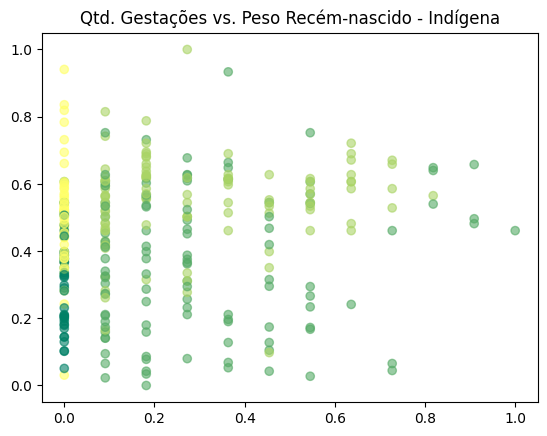

In [68]:
plt.scatter(X1['QTDGESTANT'], X1['PESO'],  
           c = KMeans(n_clusters=4,random_state=10).fit_predict(X1), cmap =plt.cm.summer, alpha = 0.6) 
plt.title("Qtd. Gestações vs. Peso Recém-nascido - Indígena")
plt.show() 

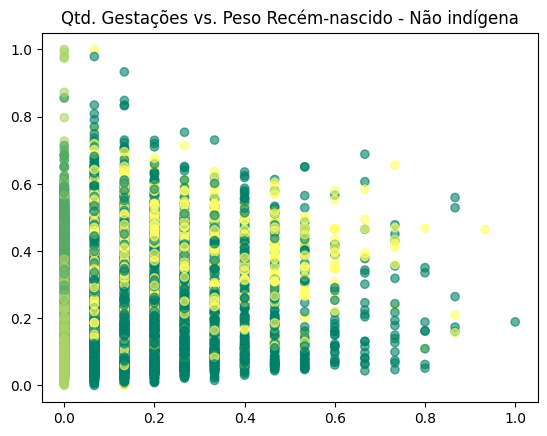

In [69]:
plt.scatter(X0['QTDGESTANT'], X0['PESO'],  
           c = KMeans(n_clusters=4,random_state=10).fit_predict(X0), cmap =plt.cm.summer, alpha = 0.6) 
plt.title("Qtd. Gestações vs. Peso Recém-nascido - Não indígena")
plt.show() 